# CATEGORIS 1.NOMINAL ,2.ORIDNAL
#nOMINAL EG:BUS,LORRY
#ORDINAL:LIKE RANK CATEGORIES AND EX:(QUALIFICATION,PERCENTAGE)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# One HOT ENCODING

In [73]:
data=pd.read_csv("test.csv",usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,n,f,d,t,a
1,b,ai,a,d,b,g
2,v,as,f,d,a,j
3,l,n,f,d,z,l
4,s,as,c,d,y,i


In [3]:
pd.get_dummies(data,drop_first=True).shape

(4209, 121)

In [4]:
# finding the top most frequently occuring charcter upto 10 in the data
data.X1.value_counts().sort_values(ascending=False).head(10)

aa    826
s     602
l     599
b     596
v     436
r     252
i     189
a     153
c     142
o      81
Name: X1, dtype: int64

In [82]:
top_10=data.X1.value_counts().sort_values(ascending=False).head(10).index#
top_10

Index(['aa', 's', 'l', 'b', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [6]:
for column in top_10:#iterates the top 10 coulmn previouly mentioned
    data[column]=np.where(data['X1']==column,1,0)# select wheter the data x1 is in top 10 and encoind to 0 or 1 
data[['X1']+top_10].head(40)#finally print the data accordingly at there

,X1,aa,s,l,b,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,b,0,0,0,1,0,0,0,0,0,0
2,v,0,0,0,0,1,0,0,0,0,0
3,l,0,0,1,0,0,0,0,0,0,0
4,s,0,1,0,0,0,0,0,0,0,0
5,aa,1,0,0,0,0,0,0,0,0,0
6,b,0,0,0,1,0,0,0,0,0,0
7,s,0,1,0,0,0,0,0,0,0,0
8,l,0,0,1,0,0,0,0,0,0,0
9,v,0,0,0,0,1,0,0,0,0,0


# COUNT OR FREQUENCY ENCODING AND  NOMINAL ENCODING
nominal encoding = normal like(cat,cow,dog)
ordinal encoding=performs rank distribution(best,better,good)priotiy wise

In [7]:
data=pd.read_csv("test.csv",usecols=['X1','X2'])
pd.get_dummies(data).shape

(4209, 72)

In [8]:
len(data['X1'].unique())
data.X1.value_counts().to_dict()

{'aa': 826,
 's': 602,
 'l': 599,
 'b': 596,
 'v': 436,
 'r': 252,
 'i': 189,
 'a': 153,
 'c': 142,
 'o': 81,
 'w': 50,
 'u': 40,
 'z': 31,
 'e': 29,
 'm': 27,
 'h': 27,
 'j': 22,
 'y': 21,
 't': 18,
 'n': 16,
 'f': 12,
 'k': 12,
 'p': 10,
 'g': 9,
 'ab': 5,
 'q': 3,
 'd': 1}

# x1_frequency=data.X1.value_counts().to_dict()# finding the counts to the x1 column
data.X1=data.X1.map(x1_frequency)#convert the value of the letters to its frequency
x2_frequency=data.X2.value_counts().to_dict()# finding the counts to the x2 column
data.X2=data.X2.map(x2_frequency)# 
data.head()

## COMPLETE FEATURE ENGINEERING

## HANDLE MISSING VALUES
  ### What are the types of the missing data?
    1.MCAR (Missing Completeley at random)
      The data which is missing in one feature and data which is missing in any other feature is didnot have any 
      relationship among missing feature and all other features
    2.MCNAR(MISSING completely not at random)
      The data which is missing in one feature and data which is missing in any other feature is have any some
      relationship among missing feature and all other features

## 1. Missing completeley at random(mcar)

In [9]:
data=pd.read_csv('train.csv')# take the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.isnull().sum()# finding the how many null values of each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# in the above type the Age as null value,Cabin and Embarked since the age and embark
data[data['Age'].isnull()]# printing the data where the age is null
data[data['Embarked'].isnull()]# printinf the cabin is has null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### in this type the Age and Cabin are have relationship and embark and age didnot have much relationship.
     In this it is relationship among gives more static and embark is not more related so it gives the not independent

## missing data  Not at random(MCNAR)

In [12]:
data['age_null']=np.where(data['Age'].isnull(),1,0)# collecting the age is null or not and convert to 0 or 1 and do it in new age_null column 
data['age_null'].mean()*100 # finding the precentage 
data['cabin_null']=np.where(data['Cabin'].isnull(),1,0)# similarly the above line

In [13]:
# used for combining and finding the how many percentage is survived or not (0 OR 1)
data.groupby(['Survived'])['age_null'].mean()*100

Survived
0    22.768670
1    15.204678
Name: age_null, dtype: float64

In [14]:
data.groupby(['Survived'])['cabin_null'].mean()*100 # similarly for cabin_null

Survived
0    87.613843
1    60.233918
Name: cabin_null, dtype: float64

### MISSING AT RANDOM

### Example:
     Men--hide their history
     Women--ide their age

# TYpes of the techniQUES TO HANDLE missing data

## TYPES:
   ### 1.Mean,median,Mode Replacement
   ### 2.RAndom Sample Imputation
   ### 3.Capturing the NAN values with the new features
   ### 4.End of the distribution imputation
   ### 5.Arbitary imputation
   ### 6.frequent imputation

# 1.Mean/Median/Mode Replacement
 ### Where it is used?
     It is used in the MCAR (Missing Completely at random) by finding the 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data=pd.read_csv('train.csv',usecols=['Age','Cabin','Survived'])
data.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [17]:
data.isnull().mean()*100# finding the mean of the value of the data

Survived     0.000000
Age         19.865320
Cabin       77.104377
dtype: float64

In [18]:
def impute_median(data,col,Median):
    data[col+"_median"]=data[col].fillna(Median)#fill the median value to the newcoming column

In [19]:
Median=data.Age.median()
impute_median(data,'Age',Median)

In [20]:
data.head()

,Survived,Age,Cabin,Age_median
0,0,22.0,NaN,22.0
1,1,38.0,C85,38.0
2,1,26.0,NaN,26.0
3,1,35.0,C123,35.0
4,0,35.0,NaN,35.0


In [21]:
data.Age.std()
data.Age_median.std()

13.019696550973194

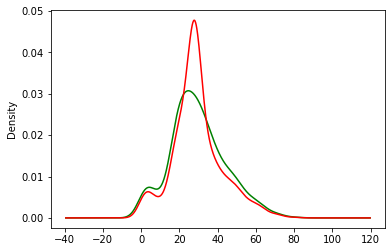

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',color='green')
data.Age_median.plot(kind='kde', color='red') 
lines, labels = ax.get_legend_handles_labels()

#### ADVANTAGES
    1.Easy to implement
    2.Faster way to obtain the complete the dataset
#### DISADVANTAGES
    1.change in the disortion of the originl variance
    2.Impacts cooreleation

## 2.RANDOM SAMPLE IMPUTATION
AIM: Random sample imputation consists of taking the random observation from the dataset and we use the observation to replace the NAN value.

#### When should be used?
      It should be used when the data is completely missing at random(MCAR).

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Survived','Cabin','Fare'])#choose the column from the dataset for make observation. 
df.head()

,Survived,Age,Fare,Cabin
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,C85
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,C123
4,0,35.0,8.0500,NaN


In [7]:
# finding which column consists null and occurences of the null of that column
df.isnull().sum()

Survived      0
Age         177
Fare          0
Cabin       687
dtype: int64

In [8]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
Cabin       0.771044
dtype: float64

In [5]:
df['Age'].dropna().sample()

530    2.0
Name: Age, dtype: float64

In [29]:
# take the value of the age and randomly take sample value
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
def impute_median(df,col,Median):
    df[col+"_median"]=df[col].fillna(Median)#fill the median value to the newcoming column
    df[col+"_random"]=df[col]
    random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)# randomly impute the values
    random_sample.index=df[df[col].isnull()].index # takes the index of the randomsample and merge it
    df.loc[df[col].isnull(),col+'_random']=random_sample# finally place the value where the value is NAN

In [12]:
median=df.Age.median()
median

28.0

In [24]:
impute_median(df,'Age',median)

In [26]:
df.head()

,Survived,Age,Fare,Cabin,Age_median,Age_random
0,0,22.0,7.2500,NaN,22.0,22.0
1,1,38.0,71.2833,C85,38.0,38.0
2,1,26.0,7.9250,NaN,26.0,26.0
3,1,35.0,53.1000,C123,35.0,35.0
4,0,35.0,8.0500,NaN,35.0,35.0


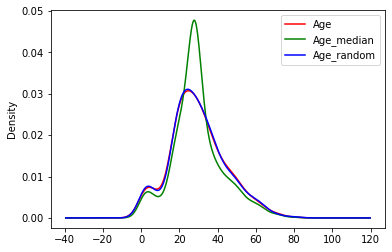

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',color='red')
df['Age_median'].plot(kind='kde',color='green')
df['Age_random'].plot(kind='kde', color='blue') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### the age_random give the best accuracy then age_median by predicting through the age dataset

### ADVANTAGES:
    1. Easy To implement
    2.there is less disortiion
###   DISADVANTAGES:
    1.Every situation randomness wont work 

### 3 .Capturing the NAN values with new features
    Aim:
       it is used in MCNAR       

In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare'])
df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [9]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [12]:
df.Age.fillna(df.Age.mean(),inplace=True)# put the values of the mean inplace where the NAN values

In [13]:
df.head(10)

,Age,Fare,Age_NAN
0,22.0,7.2500,0
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,0
5,28.0,8.4583,1
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,0
9,14.0,30.0708,0


### Advantages and disadvantage
     1.Easy to implement
     2.captures the importance of the NAN values
#### disadvantage:
     1.creating additional features(Curse of dimensonality)

#### 4.End of distribution
    AIM:
       it is used in MCNAR(MIssing comple Not at random)
    PURPOSE:
       it is used by the through the last value of the variance

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare'])
df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [49]:
df.Age.isnull().sum()

177

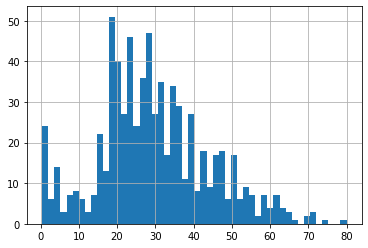

In [6]:
df.Age.hist(bins=50)

### using the normal distribution formulae(mean+3*std) to find the last value of the distributed 

In [60]:
extreme=df.Age.mean()+3*df.Age.std()# formulae(mean+3*std)

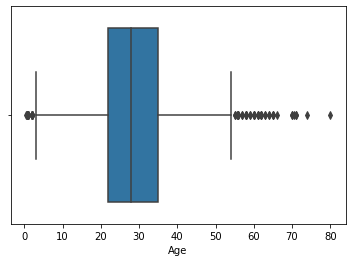

In [41]:
sns.boxplot('Age',data=df)

In [5]:
def imputeNan(df,column,median):
    df[column+"_end_distri"]=df[column].fillna(df.Age.mean()+3*df.Age.std())# simply filling the values
    df[column].fillna(median,inplace=True)

In [6]:
median=df.Age.median()
imputeNan(df,'Age',median)

In [7]:
df.head()

,Age,Fare,Age_end_distri
0,22.0,7.2500,22.0
1,38.0,71.2833,38.0
2,26.0,7.9250,26.0
3,35.0,53.1000,35.0
4,35.0,8.0500,35.0


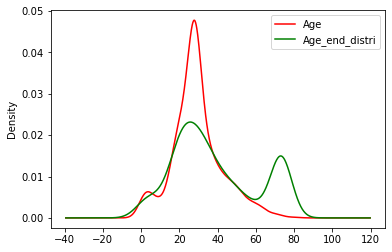

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',color='red')
df['Age_end_distri'].plot(kind='kde',color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

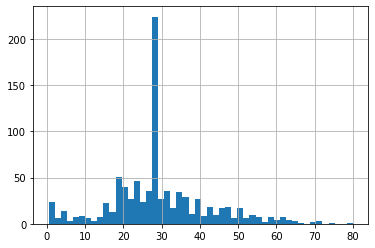

In [24]:
df.Age.hist(bins=50)

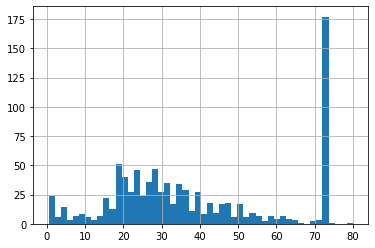

In [9]:
df.Age_end_distri.hist(bins=50)

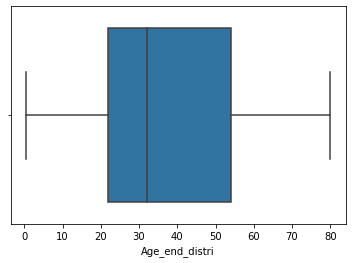

In [10]:
sns.boxplot('Age_end_distri',data=df)

### Advantages:
  

# 4.Arbitary value imputation
    this technique was derived in Kaggle comptetion it is replacing of NAN values

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df['Age'].fillna(100)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    100.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64

# 5.HANDLE values of categorical (alphabets)

## 6.frequent category imputation

In [7]:
df=pd.read_csv('house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [19]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

# find the most frequent values in and replace with NAN values

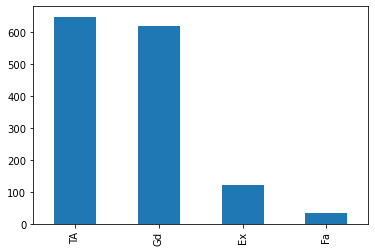

In [23]:
df['BsmtQual'].value_counts().plot.bar()

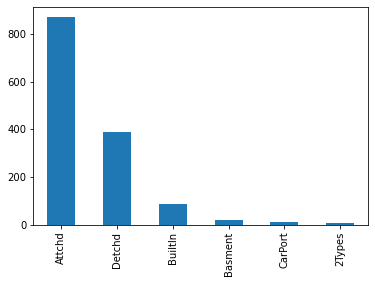

In [25]:
df['GarageType'].value_counts().plot.bar()

In [3]:
df['GarageType'].mode()[0]# the mode method is also find the most occurnces of the value

'Attchd'

In [4]:
def imputeNAN(df,col):
    most_frequent_val=df[col].mode()[0]# append the value to the most occurences values in the list
    df[col].fillna(most_frequent_val,inplace=True)# fill the value of the most occurences

In [6]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    imputeNAN(df,feature)

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### Advantages:
    this is easy to implement
### Dis advantages:
     it applies for replace the NAN values of small amount(ie 50-90)

# 6.Adding the variable to capture the NAN

In [3]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [5]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [6]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [7]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [8]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Suppose if we have the most frequent categories we just replace with NAN value 
  ### (Most ferquently used in real life companys)

In [9]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [13]:
def impute_NAN(df,col):
    df[col+'_newvar']=np.where(df[col].isnull(),'MISSING!',df[col])# replace the NAN value with new variable(MIssing)

In [11]:
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_NAN(df,feature)

In [14]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,NaN,Attchd,208500,Gd,MISSING!,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [15]:
df.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice'],axis=1)

,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,MISSING!,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,MISSING!,Attchd,142125


# HOW TO HANDLE CATEGORICAL FEATURES

## ONE HOT ENCODING

In [18]:
df=pd.read_csv('train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [21]:
pd.get_dummies(df['Sex'])# encoding to 0 or 1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [24]:
pd.get_dummies(df['Sex'],drop_first=True)# drop the column first of the encoded value

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
df=pd.read_csv('train.csv',usecols=['Embarked'])# like above using the embark value

In [29]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [32]:
pd.get_dummies(df['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


### Onehot encoding with many categories in a features

In [2]:
df=pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [3]:
for i in df.columns:
    print(len(df[i].unique()))# finding the unique variables of the column

47
27
44
7
4
29
12


In [4]:
top_10=df.X0.value_counts().sort_values(ascending=False).head(10).index#
top_10  # finding the top 10 values and do one hot encoding 

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [6]:
top_10=list(top_10)
top_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [19]:
for category in top_10:
    df[category+'X1']=np.where(df['X1']==category,1,0)

In [22]:
df.head(10)

,X0,X1,X2,X3,X4,X5,X6,zX1,akX1,yX1,ayX1,tX1,xX1,oX1,fX1,nX1,wX1
0,k,0,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,0,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,0,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,0,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,0,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
5,t,0,e,c,d,g,h,0,0,0,0,0,0,0,0,0,0
6,al,0,e,f,d,f,h,0,0,0,0,0,0,0,0,0,0
7,o,0,as,f,d,f,j,0,0,0,0,0,0,0,0,0,0
8,w,0,as,e,d,f,i,0,0,0,0,0,0,0,0,0,0
9,j,0,aq,c,d,f,a,0,0,0,0,0,0,0,0,0,0


## Ordinal encoding
#### AIM:
      it uses as in the occurding to priority (top ranking)
      eg: 10th,12th,college (college has the highest priority) 

In [11]:
import datetime as dat

In [12]:
today_date=dat.datetime.today()

In [4]:
today_date

datetime.datetime(2020, 12, 6, 9, 58, 15, 712232)

In [13]:
days=[today_date-dat.timedelta(x) for x in range(0,30)]# printing the dates before 30 days uptill today

In [14]:
days

[datetime.datetime(2020, 12, 6, 10, 3, 35, 725360),
 datetime.datetime(2020, 12, 5, 10, 3, 35, 725360),
 datetime.datetime(2020, 12, 4, 10, 3, 35, 725360),
 datetime.datetime(2020, 12, 3, 10, 3, 35, 725360),
 datetime.datetime(2020, 12, 2, 10, 3, 35, 725360),
 datetime.datetime(2020, 12, 1, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 30, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 29, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 28, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 27, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 26, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 25, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 24, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 23, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 22, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 21, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 20, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 19, 10, 3, 35, 725360),
 datetime.datetime(2020, 11, 18, 10, 3, 35, 725360),

In [6]:
df=pd.DataFrame(days)
df.columns=['DAY']

In [7]:
df.head()

,DAY
0,2020-12-06 09:58:15.712232
1,2020-12-05 09:58:15.712232
2,2020-12-04 09:58:15.712232
3,2020-12-03 09:58:15.712232
4,2020-12-02 09:58:15.712232


In [24]:
df['weekday']=df['DAY'].dt.day_name()

In [27]:
df

,DAY,weekday
0,2020-12-06 09:58:15.712232,Sunday
1,2020-12-05 09:58:15.712232,Saturday
2,2020-12-04 09:58:15.712232,Friday
3,2020-12-03 09:58:15.712232,Thursday
4,2020-12-02 09:58:15.712232,Wednesday
5,2020-12-01 09:58:15.712232,Tuesday
6,2020-11-30 09:58:15.712232,Monday
7,2020-11-29 09:58:15.712232,Sunday
8,2020-11-28 09:58:15.712232,Saturday
9,2020-11-27 09:58:15.712232,Friday


In [29]:
week={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [30]:
df['days_ordinal']=df['weekday'].map(week)# mapping the values of the week to df

In [31]:
df

,DAY,weekday,days_ordinal
0,2020-12-06 09:58:15.712232,Sunday,7
1,2020-12-05 09:58:15.712232,Saturday,6
2,2020-12-04 09:58:15.712232,Friday,5
3,2020-12-03 09:58:15.712232,Thursday,4
4,2020-12-02 09:58:15.712232,Wednesday,3
5,2020-12-01 09:58:15.712232,Tuesday,2
6,2020-11-30 09:58:15.712232,Monday,1
7,2020-11-29 09:58:15.712232,Sunday,7
8,2020-11-28 09:58:15.712232,Saturday,6
9,2020-11-27 09:58:15.712232,Friday,5


### Count or frequency Encoding

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None) 
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
columns=[1,3,5,6,7,8,9,13]

In [6]:
train_set=train_set[columns]# set the columns to train_set

In [8]:
train_set.columns=['Employement','Degree','status','Designation','Family_job','Race','Sex','Country']# writing thecolumns of that

In [9]:
train_set.head()

,Employement,Degree,status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [11]:
# find the count of the features in individual column
for feature in train_set.columns[:]:
    print(feature,':',len(train_set[feature].unique()),'labels')

Employement : 9 labels
Degree : 16 labels
status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [12]:
for feature in train_set.columns[:]:
    country_map=train_set[feature].value_counts().to_dict()# find the frequency of the individual counts of the column and put into dict
    train_set[feature]=train_set[feature].map(country_map)# map to the train_set through the dictionary

In [13]:
train_set.head()

,Employement,Degree,status,Designation,Family_job,Race,Sex,Country
0,1298,5355,10683,3770,8305,27816,21790,29170
1,2541,5355,14976,4066,13193,27816,21790,29170
2,22696,10501,4443,1370,8305,27816,21790,29170
3,22696,1175,14976,1370,13193,3124,21790,29170
4,22696,5355,14976,4140,1568,3124,10771,95


### Advantages:
    1.Easy to Use
    2.Not increasing Feature space
### Disadvantages:
    1.it will provide the same weight if the frequencies are same

# Target ordinal Encoding
 
    1.Ordering the labels according to the target
    2.Replace the joint probability of being 1 or 0
    3.Using the target values take the mean of the survived with respect tor that

In [5]:
df=pd.read_csv('train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [9]:
df['Cabin'].fillna('Miss',inplace=True)
df.head()

,Survived,Cabin
0,0,Miss
1,1,C85
2,1,Miss
3,1,C123
4,0,Miss


In [17]:
df['Cabin']=df['Cabin'].astype(str).str[0]# convertint the values into single character by finding the 0th index
df.head(20)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [26]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()# using the values find the mean values and sorted

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [25]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index# finding the people percent survived respect to cabin and sorted to index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [29]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}

In [30]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [31]:
df['Cabin']=df['Cabin'].map(ordinal_labels2)

In [34]:
df.head()

,Survived,Cabin
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1


In [ ]:
### Mean Encoding

In [38]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().sort_values().to_dict()# through the mean values

In [37]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,mean_ordinal_encode
0,0,1,0.299854
1,1,4,0.593220
2,1,1,0.299854
3,1,4,0.593220
4,0,1,0.299854


### Probability ratio encoding

In [3]:
df=pd.read_csv('train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [4]:
df['Cabin'].fillna('Missing',inplace=True)# replace the NAN values with missing values
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [5]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [11]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [6]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [7]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [9]:
prob_df['Died']=1-prob_df['Survived']# probability ratio encoding

In [11]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [13]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']

In [15]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [17]:
df['Cabin_Encoded']=df['Cabin'].map(probability_encoded)

In [18]:
df.head()

,Survived,Cabin,Cabin_Encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


### Transformation of features
    1.Linear Regression---Gradient Descent----Global Minima
    2.Algorithms like KNN,K means,Herirchal clustering ---- Eucledian Distance
    
    Every point has some vector and Direction
    Deep learning technique (Standardisation,Scaling)1.ANN--->Global Minima,Gradient 2.CNN 3.RNN 
    
### Types Of transformation:
    1.Normalisation and standardisation
    2.Scaling Minimum value and maximum values
    3.scaling to median and quantiles
    4.Gaussian Distribution
        logarthimic distribution
        reciprocal Transformation
        Square root transformation
        Exponential transformation
        Box cox transoframtion

# Normalisation and Standardization

## Standardisation:
    We try to bring all the features or variables to a similar scale(otherwise standardistion called as the centering
    the variable at zero
   ####  z = (x-x_mean)/std

In [6]:
df=pd.read_csv('train.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
# first find the values which are null
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
# the above is giving the age as nan values
df['Age'].fillna(df.Age.median(),inplace=True)# replace the NAN valus with median values or mean etc.

In [6]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)# fit_transform is for changing the values while transformation in ML

In [7]:
pd.DataFrame(df_scaled)# completely changes with respect to whole features of the variable

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <a list of 20 Patch objects>)

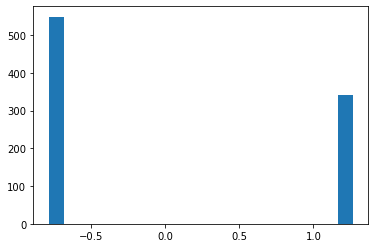

In [13]:
plt.hist(df_scaled[:,0],bins=20)# take all the records and zeroth index

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

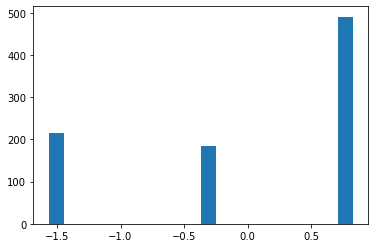

In [12]:
plt.hist(df_scaled[:,1],bins=20)# take all the records and first index

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

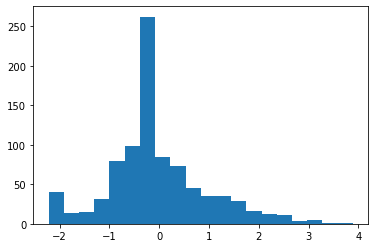

In [15]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

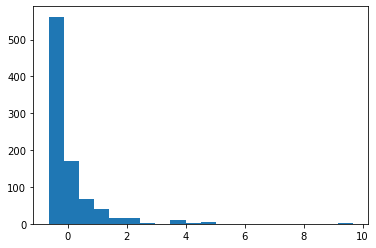

In [17]:
plt.hist(df_scaled[:,3],bins=20)

## Min Max Scaling(scaling between 0 to 1) CNN--Deep learning
#### X_Scaled=(X-X.min/X-X.max)

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [20]:
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

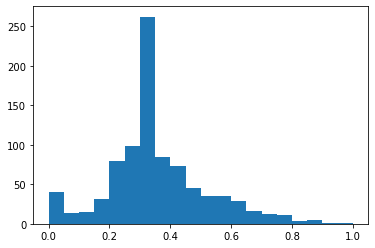

In [21]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

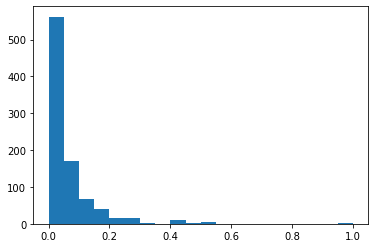

In [23]:
plt.hist(df_minmax['Fare'],bins=20)

# Robust Scaler
    It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the  median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

    IQR = 75th quantile - 25th quantile

    X_scaled = (X - X.median) / IQR

    0,1,2,3,4,5,6,7,8,9,10

     9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [10]:
from sklearn.preprocessing import RobustScaler

In [9]:
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 20 Patch objects>)

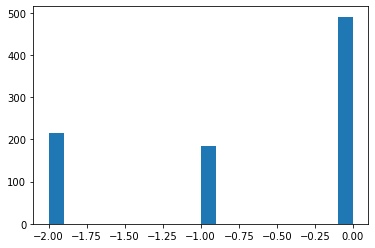

In [10]:
plt.hist(df_robust_scaler['Pclass'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

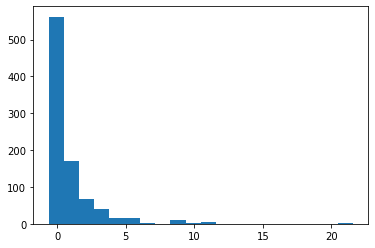

In [13]:
plt.hist(df_robust_scaler['Fare'],bins=20)

### Gaussian Distribution
    Purpose:
     When the distrbution which after scaled down the values and find it is not normally or gaussianlly distributed 
     we should change into gaussian distrbution
     Some machine learning algorithms required normally distrbuted so it requires
   #### The various techniques are:
        logarthimic distribution
        reciprocal Transformation
        Square root transformation
        Exponential transformation
        Box cox transoframtion

## Logarthmic distrbution

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Survived','Fare'])
df.head()            

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# the above is giving the age as nan values
df['Age'].fillna(df.Age.median(),inplace=True)# replace the NAN valus with median values or mean etc.
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
import scipy.stats as stat
import pylab

In [6]:
def plot(df,column):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[column].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[column],dist='norm',plot=pylab)
    plt.show()

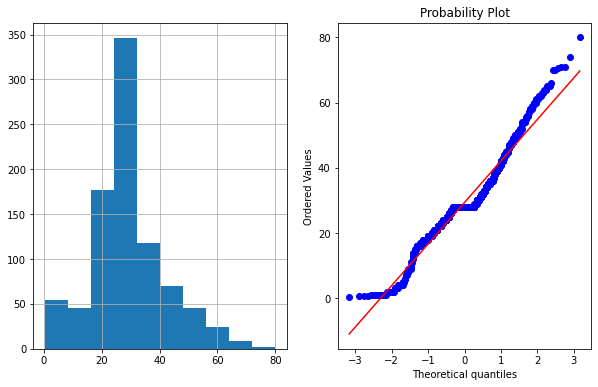

In [7]:
plot(df,'Age')

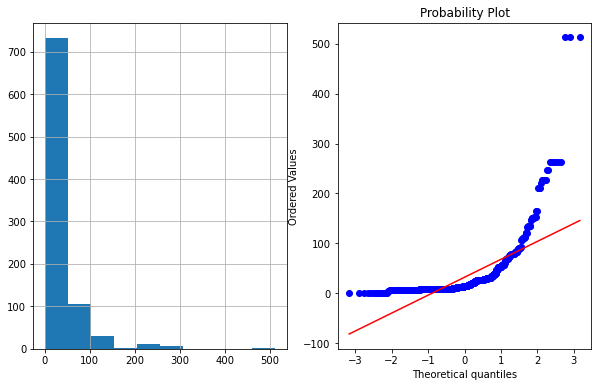

In [34]:
plot(df,'Fare')

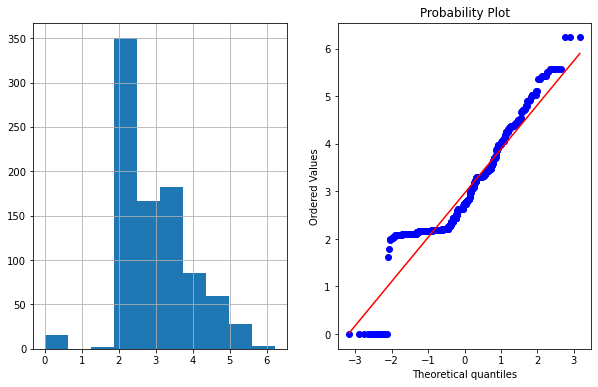

In [36]:
df['log_fare']=np.log1p(df['Fare'])
plot(df,'log_fare')

## Reciprocal Transformation

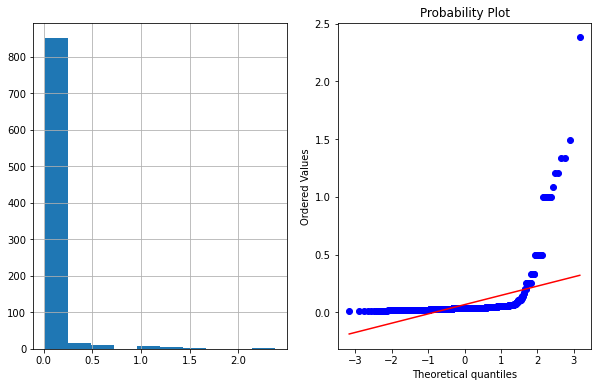

In [21]:
df['Age_reciprocal']=1/df['Age']
plot(df,'Age_reciprocal')

## suqare root transformation

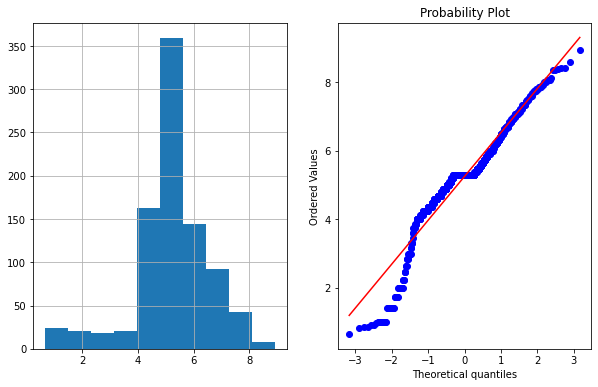

In [24]:
df['squ_age']=df['Age']**(1/2)
plot(df,'squ_age')

## EXponential distribution

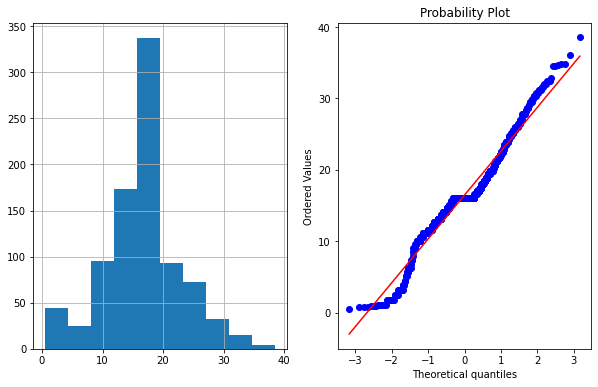

In [27]:
df['age_expon']=df.Age**(1/1.2)
plot(df,'age_expon')

## Box cox transformation
    The Box-Cox transformation is defined as:

    T(Y)=(Y exp(λ)−1)/λ

    where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all       values of λ are considered and the optimal value for a given variable is selected.

In [29]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [31]:
print(parameters)

0.7964531473656952


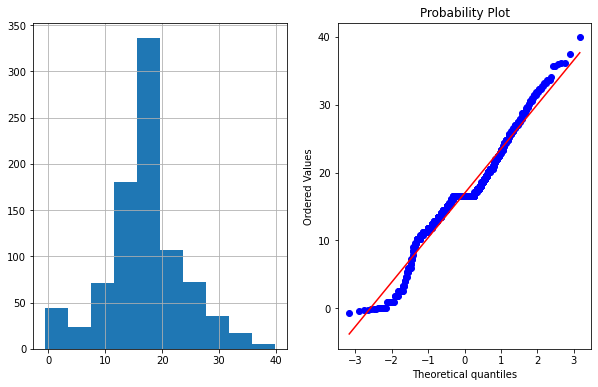

In [33]:
plot(df,'Age_Boxcox')

# How to handle imbalanced dataset

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)